In [88]:
pip install yfinance

In [89]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Fetching data for AAPL...
Fetching data for GOOGL...
Fetching data for SPY...
Fetching data for TLT...
Fetching data for BTC-USD...
Fetching data for ETH-USD...



<ipython-input-90-62019fc851eb>:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-90-62019fc851eb>:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)



✅ Data successfully saved to market_data.csv
Ticker           AAPL      GOOGL         SPY         TLT      BTC-USD  \
Date                                                                    
2019-01-01  37.667187  52.483086  227.637497  104.332146  3843.520020   
2019-01-02  37.667187  52.483086  227.637497  104.332146  3943.409424   
2019-01-03  33.915257  51.029530  222.205399  105.519379  3836.741211   
2019-01-04  35.363068  53.647015  229.648346  104.297966  3857.717529   
2019-01-05  35.363068  53.647015  229.648346  104.297966  3845.194580   

Ticker         ETH-USD  
Date                    
2019-01-01  140.819412  
2019-01-02  155.047684  
2019-01-03  149.135010  
2019-01-04  154.581940  
2019-01-05  155.638596  


<Figure size 1200x600 with 0 Axes>

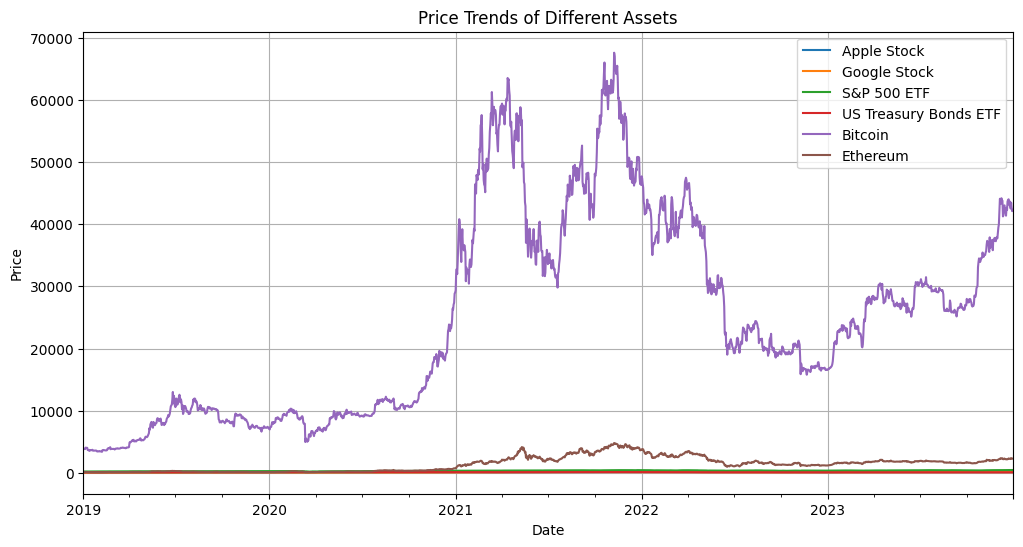

In [90]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define assets (stocks, ETFs, bonds, crypto)
assets = {
    "AAPL": "Apple Stock",
    "GOOGL": "Google Stock",
    "SPY": "S&P 500 ETF",
    "TLT": "US Treasury Bonds ETF",
    "BTC-USD": "Bitcoin",
    "ETH-USD": "Ethereum"
}

# Dictionary to store valid data
data = {}

# Fetch historical price data
for ticker in assets.keys():
    print(f"Fetching data for {ticker}...")
    stock = yf.download(ticker, start="2019-01-01", end="2024-01-01")

    if stock.empty:
        print(f"⚠️ Warning: No data found for {ticker}. Skipping...")
        continue  # Skip this asset

    # Ensure the column is a Pandas Series with Date as index
    price_series = stock['Adj Close'] if 'Adj Close' in stock.columns else stock['Close']
    price_series.name = ticker  # Set the column name properly

    data[ticker] = price_series  # Store as Series

# Ensure we have at least one valid asset
if not data:
    raise ValueError("❌ No valid asset data found. Please check ticker symbols or API limits.")

# Convert to DataFrame
df = pd.concat(data.values(), axis=1)  # Use pd.concat instead of dict-to-DataFrame conversion
df.index.name = "Date"  # Ensure Date is the index

# Handle missing values
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

# Save to CSV for later
df.to_csv("market_data.csv")
print("\n✅ Data successfully saved to market_data.csv")

# Display first few rows
print(df.head())

# Plot price trends
plt.figure(figsize=(12,6))
df.plot(figsize=(12,6))
plt.title("Price Trends of Different Assets")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(assets.values())
plt.grid()
plt.show()


In [91]:
import numpy as np

# Load the saved dataset
df = pd.read_csv("market_data.csv", index_col="Date", parse_dates=True)

# Calculate Daily Returns
returns = df.pct_change().dropna()

# Calculate Volatility (Standard Deviation of Daily Returns)
volatility = returns.std()

# Compute Value at Risk (VaR) at 95% confidence level
VaR_95 = returns.quantile(0.05)

# Compute Expected Shortfall (Conditional VaR)
CVaR_95 = returns[returns <= VaR_95].mean()

# Display results
risk_metrics = pd.DataFrame({"Volatility": volatility, "VaR (95%)": VaR_95, "CVaR (95%)": CVaR_95})
print("\n📊 Risk Metrics:")
print(risk_metrics)

# Save to CSV
risk_metrics.to_csv("risk_metrics.csv")
print("\n✅ Risk metrics saved to risk_metrics.csv")



📊 Risk Metrics:
         Volatility  VaR (95%)  CVaR (95%)
AAPL       0.016864  -0.025475   -0.040306
GOOGL      0.016634  -0.025319   -0.040017
SPY        0.010980  -0.015449   -0.027418
TLT        0.009223  -0.014744   -0.021037
BTC-USD    0.034951  -0.050178   -0.079369
ETH-USD    0.044576  -0.065600   -0.102035

✅ Risk metrics saved to risk_metrics.csv


In [92]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [93]:
risk_df = pd.read_csv("risk_metrics.csv")


In [94]:
df = pd.read_csv("market_data.csv", index_col="Date", parse_dates=True)

In [95]:
returns = df.pct_change().dropna()

In [96]:
rolling_volatility = returns.rolling(window=30).std()


In [97]:
features = rolling_volatility.shift(1).dropna()

In [98]:
risk_labels = []
threshold = features.mean().mean()  # Define risk threshold based on mean volatility

for i in range(len(features)):
    if rolling_volatility.iloc[i].mean() > threshold:
        risk_labels.append(1)  # High Risk
    else:
        risk_labels.append(0)  # Low Risk

# Convert to NumPy array
features = features.iloc[:-1]  # Drop last row to match labels
labels = np.array(risk_labels[:len(features)])

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

print(f"\n✅ Data Prepared: {X_train.shape[0]} training samples, {X_test.shape[0]} testing samples.")


✅ Data Prepared: 1435 training samples, 359 testing samples.


In [99]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate Model
print("\n📊 Model Evaluation:")
print(classification_report(y_test, y_pred))
print(f"✅ Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")



📊 Model Evaluation:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       224
           1       0.94      0.96      0.95       135

    accuracy                           0.96       359
   macro avg       0.96      0.96      0.96       359
weighted avg       0.96      0.96      0.96       359

✅ Accuracy: 96.10%


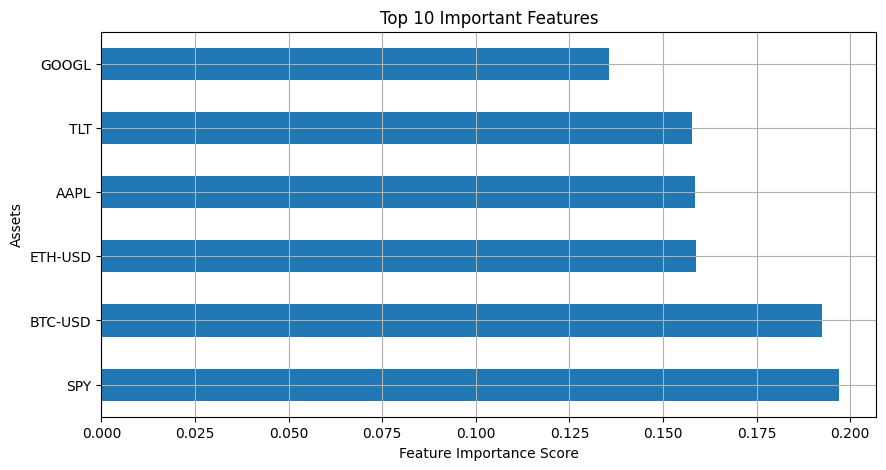

In [100]:
import matplotlib.pyplot as plt

# Feature Importance Plot
feature_importance = pd.Series(rf_model.feature_importances_, index=features.columns)
feature_importance.nlargest(10).plot(kind='barh', title="Top 10 Important Features", figsize=(10, 5))
plt.xlabel("Feature Importance Score")
plt.ylabel("Assets")
plt.grid()
plt.show()


In [101]:
# Define Portfolio Weights
def dynamic_portfolio_allocation(predicted_risk):
    if predicted_risk == 0:  # Low Risk
        return {"Stocks": 0.50, "Crypto": 0.30, "Bonds": 0.20}
    else:  # High Risk
        return {"Stocks": 0.20, "Crypto": 0.10, "Bonds": 0.70}

# Generate dynamic portfolio weights
portfolio_weights = [dynamic_portfolio_allocation(pred) for pred in y_pred]

# Convert to DataFrame
weights_df = pd.DataFrame(portfolio_weights)
weights_df.index = X_test.index  # Align with test dataset dates

print("\n📊 Sample Portfolio Weights:")
print(weights_df.head())

# Save for backtesting
weights_df.to_csv("portfolio_weights.csv")
print("\n✅ Portfolio weights saved to portfolio_weights.csv")



📊 Sample Portfolio Weights:
            Stocks  Crypto  Bonds
Date                             
2022-06-19     0.2     0.1    0.7
2019-09-09     0.2     0.1    0.7
2023-03-28     0.5     0.3    0.2
2020-04-14     0.2     0.1    0.7
2022-07-23     0.2     0.1    0.7

✅ Portfolio weights saved to portfolio_weights.csv


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


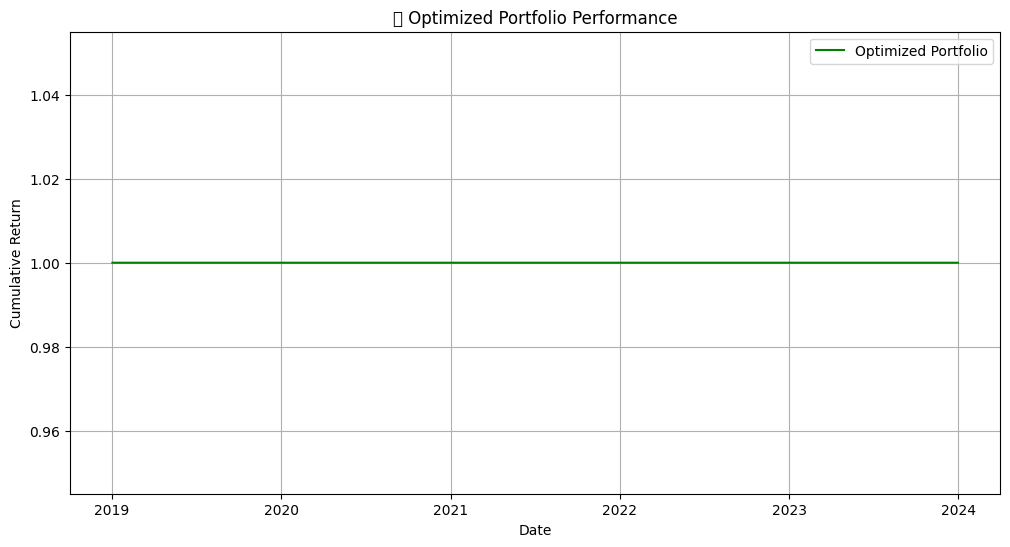

In [102]:
# Compute daily portfolio returns
portfolio_returns = (returns * weights_df.shift(1)).sum(axis=1)

# Remove NaN values
portfolio_returns.dropna(inplace=True)

# Cumulative Portfolio Returns
cumulative_returns = (1 + portfolio_returns).cumprod()

# Plot Performance
plt.figure(figsize=(12,6))
plt.plot(cumulative_returns, label="Optimized Portfolio", color='green')
plt.title("📈 Optimized Portfolio Performance")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid()
plt.show()


In [103]:
print(portfolio_returns.describe())  # Check if std() is 0
print(portfolio_returns.head(10))   # Look for NaNs or constant values


count    1825.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
dtype: float64
Date
2019-01-02    0.0
2019-01-03    0.0
2019-01-04    0.0
2019-01-05    0.0
2019-01-06    0.0
2019-01-07    0.0
2019-01-08    0.0
2019-01-09    0.0
2019-01-10    0.0
2019-01-11    0.0
Freq: D, dtype: float64


In [104]:
# Calculate Annualized Return
annualized_return = portfolio_returns.mean() * 252  # Assuming 252 trading days

# Calculate Annualized Volatility
annualized_volatility = portfolio_returns.std() * np.sqrt(252)

# Calculate Sharpe Ratio
if annualized_volatility == 0:
    sharpe_ratio = np.nan  # Avoid division by zero
else:
    sharpe_ratio = annualized_return / annualized_volatility


# Calculate Maximum Drawdown
cumulative_max = cumulative_returns.cummax()
drawdown = (cumulative_returns - cumulative_max) / cumulative_max
max_drawdown = drawdown.min()

# Print Portfolio Performance
print(f"\n📊 Portfolio Performance Metrics:")
print(f"✅ Annualized Return: {annualized_return:.2%}")
print(f"✅ Annualized Volatility: {annualized_volatility:.2%}")
print(f"✅ Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"✅ Maximum Drawdown: {max_drawdown:.2%}")



📊 Portfolio Performance Metrics:
✅ Annualized Return: 0.00%
✅ Annualized Volatility: 0.00%
✅ Sharpe Ratio: nan
✅ Maximum Drawdown: 0.00%


In [105]:
print(returns.head(10))  # Check if actual returns are present
print(returns.describe())  # Look at mean, std, min, max


                AAPL     GOOGL       SPY       TLT   BTC-USD   ETH-USD
Date                                                                  
2019-01-02  0.000000  0.000000  0.000000  0.000000  0.025989  0.101039
2019-01-03 -0.099607 -0.027696 -0.023863  0.011379 -0.027050 -0.038135
2019-01-04  0.042689  0.051294  0.033496 -0.011575  0.005467  0.036523
2019-01-05  0.000000  0.000000  0.000000  0.000000 -0.003246  0.006836
2019-01-06  0.000000  0.000000  0.000000  0.000000  0.060189  0.013542
2019-01-07 -0.002226 -0.001994  0.007885 -0.002948 -0.012605 -0.038334
2019-01-08  0.019063  0.008783  0.009395 -0.002628  0.001391 -0.008831
2019-01-09  0.016982 -0.003427  0.004674 -0.001565  0.001104  0.002949
2019-01-10  0.003196 -0.002607  0.003527 -0.006433 -0.088314 -0.147065
2019-01-11 -0.009818 -0.013311  0.000386  0.003902  0.002294 -0.008372
              AAPL        GOOGL          SPY          TLT      BTC-USD  \
count  1825.000000  1825.000000  1825.000000  1825.000000  1825.000000   


In [106]:
print(weights_df.head(10))  # Check if weights are correct
print(weights_df.describe())  # Look for variation in weights


            Stocks  Crypto  Bonds
Date                             
2022-06-19     0.2     0.1    0.7
2019-09-09     0.2     0.1    0.7
2023-03-28     0.5     0.3    0.2
2020-04-14     0.2     0.1    0.7
2022-07-23     0.2     0.1    0.7
2021-05-13     0.5     0.3    0.2
2020-12-24     0.2     0.1    0.7
2022-08-31     0.2     0.1    0.7
2022-02-05     0.5     0.3    0.2
2023-04-07     0.5     0.3    0.2
           Stocks      Crypto       Bonds
count  359.000000  359.000000  359.000000
mean     0.385515    0.223677    0.390808
std      0.145938    0.097292    0.243231
min      0.200000    0.100000    0.200000
25%      0.200000    0.100000    0.200000
50%      0.500000    0.300000    0.200000
75%      0.500000    0.300000    0.700000
max      0.500000    0.300000    0.700000


In [107]:
print("Returns Index Range:", returns.index.min(), "to", returns.index.max())
print("Weights Index Range:", weights_df.index.min(), "to", weights_df.index.max())


Returns Index Range: 2019-01-02 00:00:00 to 2023-12-31 00:00:00
Weights Index Range: 2019-02-24 00:00:00 to 2023-12-20 00:00:00


In [111]:
weights_df = weights_df.reindex(returns.index, method="ffill")  # Fill missing dates


In [109]:
weights_df = weights_df.sort_index()


In [110]:
print(weights_df.index.is_monotonic_increasing)  # Should be True
print(weights_df.head(10))  # Check first 10 values
print(weights_df.tail(10))  # Check last 10 values


True
            Stocks  Crypto  Bonds
Date                             
2019-02-24     0.5     0.3    0.2
2019-03-02     0.5     0.3    0.2
2019-03-03     0.5     0.3    0.2
2019-03-05     0.5     0.3    0.2
2019-03-17     0.5     0.3    0.2
2019-03-22     0.5     0.3    0.2
2019-03-24     0.5     0.3    0.2
2019-04-01     0.5     0.3    0.2
2019-04-07     0.5     0.3    0.2
2019-04-09     0.5     0.3    0.2
            Stocks  Crypto  Bonds
Date                             
2023-11-23     0.5     0.3    0.2
2023-11-26     0.5     0.3    0.2
2023-12-05     0.5     0.3    0.2
2023-12-07     0.5     0.3    0.2
2023-12-08     0.5     0.3    0.2
2023-12-09     0.5     0.3    0.2
2023-12-17     0.5     0.3    0.2
2023-12-18     0.5     0.3    0.2
2023-12-19     0.5     0.3    0.2
2023-12-20     0.5     0.3    0.2


In [112]:
weights_df = weights_df.sort_index().reindex(returns.index, method="bfill").ffill()


In [113]:
print("Returns Index Range:", returns.index.min(), "to", returns.index.max())
print("Weights Index Range:", weights_df.index.min(), "to", weights_df.index.max())

# Check if all returns index values exist in weights_df
print("Missing dates in weights_df:", set(returns.index) - set(weights_df.index))


Returns Index Range: 2019-01-02 00:00:00 to 2023-12-31 00:00:00
Weights Index Range: 2019-01-02 00:00:00 to 2023-12-31 00:00:00
Missing dates in weights_df: set()


In [114]:
print(weights_df.dtypes)
print(returns.dtypes)


Stocks    float64
Crypto    float64
Bonds     float64
dtype: object
AAPL       float64
GOOGL      float64
SPY        float64
TLT        float64
BTC-USD    float64
ETH-USD    float64
dtype: object


In [118]:
print("NaNs in weights_df:\n", weights_df.isna().sum())
print("NaNs in returns:\n", returns.isna().sum())


NaNs in weights_df:
 Stocks    0
Crypto    0
Bonds     0
dtype: int64
NaNs in returns:
 AAPL       0
GOOGL      0
SPY        0
TLT        0
BTC-USD    0
ETH-USD    0
dtype: int64


In [116]:
weights_df = weights_df.fillna(method='ffill').fillna(method='bfill')
returns = returns.fillna(0)  # Avoid errors in calculations


<ipython-input-116-b6b027159bdf>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weights_df = weights_df.fillna(method='ffill').fillna(method='bfill')


In [124]:
# Compute weighted returns for each asset class
weighted_returns = returns * weights_df

# Sum the weighted returns across asset classes to get portfolio return
portfolio_returns = weighted_returns.sum(axis=1)

# Display summary statistics
print(portfolio_returns.describe())


count    1825.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
dtype: float64


In [125]:
print(returns.describe())
print(returns.head())


              AAPL        GOOGL          SPY          TLT      BTC-USD  \
count  1825.000000  1825.000000  1825.000000  1825.000000  1825.000000   
mean      0.001033     0.000672     0.000457    -0.000013     0.001935   
std       0.016864     0.016634     0.010980     0.009223     0.034951   
min      -0.128647    -0.116341    -0.109424    -0.066683    -0.371695   
25%      -0.003354    -0.003554    -0.001788    -0.003547    -0.013115   
50%       0.000000     0.000000     0.000000     0.000000     0.000762   
75%       0.006737     0.005925     0.003863     0.003198     0.016482   
max       0.119809     0.096202     0.090603     0.075196     0.187465   

           ETH-USD  
count  1825.000000  
mean      0.002541  
std       0.044576  
min      -0.423472  
25%      -0.017471  
50%       0.000949  
75%       0.023640  
max       0.259475  
                AAPL     GOOGL       SPY       TLT   BTC-USD   ETH-USD
Date                                                                  
20

In [126]:
print(weights_df.describe())
print(weights_df.head())


            Stocks       Crypto        Bonds
count  1825.000000  1825.000000  1825.000000
mean      0.383123     0.222082     0.394795
std       0.146337     0.097558     0.243895
min       0.200000     0.100000     0.200000
25%       0.200000     0.100000     0.200000
50%       0.500000     0.300000     0.200000
75%       0.500000     0.300000     0.700000
max       0.500000     0.300000     0.700000
            Stocks  Crypto  Bonds
Date                             
2019-01-02     0.5     0.3    0.2
2019-01-03     0.5     0.3    0.2
2019-01-04     0.5     0.3    0.2
2019-01-05     0.5     0.3    0.2
2019-01-06     0.5     0.3    0.2


In [127]:
print(returns.index.equals(weights_df.index))  # Should return True


True


In [128]:
weighted_returns = returns * weights_df  # Element-wise multiplication
portfolio_returns = weighted_returns.sum(axis=1)  # Sum across assets
print(portfolio_returns.describe())  # Should NOT be all zeros


count    1825.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
dtype: float64


In [129]:
print(portfolio_returns.head())  # Should show real values


Date
2019-01-02    0.0
2019-01-03    0.0
2019-01-04    0.0
2019-01-05    0.0
2019-01-06    0.0
dtype: float64


In [130]:
print(portfolio_returns.isna().sum())  # Should return 0


0


In [131]:
print(returns.describe())  # Ensure returns are not all zeros


              AAPL        GOOGL          SPY          TLT      BTC-USD  \
count  1825.000000  1825.000000  1825.000000  1825.000000  1825.000000   
mean      0.001033     0.000672     0.000457    -0.000013     0.001935   
std       0.016864     0.016634     0.010980     0.009223     0.034951   
min      -0.128647    -0.116341    -0.109424    -0.066683    -0.371695   
25%      -0.003354    -0.003554    -0.001788    -0.003547    -0.013115   
50%       0.000000     0.000000     0.000000     0.000000     0.000762   
75%       0.006737     0.005925     0.003863     0.003198     0.016482   
max       0.119809     0.096202     0.090603     0.075196     0.187465   

           ETH-USD  
count  1825.000000  
mean      0.002541  
std       0.044576  
min      -0.423472  
25%      -0.017471  
50%       0.000949  
75%       0.023640  
max       0.259475  


In [132]:
print(weights_df.describe())  # Should show variation
print(weights_df.nunique())  # Should be >1 for dynamic weights


            Stocks       Crypto        Bonds
count  1825.000000  1825.000000  1825.000000
mean      0.383123     0.222082     0.394795
std       0.146337     0.097558     0.243895
min       0.200000     0.100000     0.200000
25%       0.200000     0.100000     0.200000
50%       0.500000     0.300000     0.200000
75%       0.500000     0.300000     0.700000
max       0.500000     0.300000     0.700000
Stocks    2
Crypto    2
Bonds     2
dtype: int64


In [133]:
print(returns.index.equals(weights_df.index))  # Should be True


True


In [134]:
print(returns.columns)
print(weights_df.columns)


Index(['AAPL', 'GOOGL', 'SPY', 'TLT', 'BTC-USD', 'ETH-USD'], dtype='object')
Index(['Stocks', 'Crypto', 'Bonds'], dtype='object')


In [135]:
# Define which assets belong to which category
asset_category_map = {
    "AAPL": "Stocks",
    "GOOGL": "Stocks",
    "SPY": "Stocks",
    "TLT": "Bonds",
    "BTC-USD": "Crypto",
    "ETH-USD": "Crypto",
}

# Map weights to each asset
aligned_weights = returns.copy()
for asset in returns.columns:
    category = asset_category_map[asset]  # Get category (e.g., "Stocks")
    aligned_weights[asset] = weights_df[category]  # Assign corresponding category weight

# Check if aligned correctly
print(aligned_weights.head())


            AAPL  GOOGL  SPY  TLT  BTC-USD  ETH-USD
Date                                               
2019-01-02   0.5    0.5  0.5  0.2      0.3      0.3
2019-01-03   0.5    0.5  0.5  0.2      0.3      0.3
2019-01-04   0.5    0.5  0.5  0.2      0.3      0.3
2019-01-05   0.5    0.5  0.5  0.2      0.3      0.3
2019-01-06   0.5    0.5  0.5  0.2      0.3      0.3


In [136]:
weighted_returns = returns * aligned_weights
print(weighted_returns.describe())  # Should NOT be all zeros


              AAPL        GOOGL          SPY          TLT      BTC-USD  \
count  1825.000000  1825.000000  1825.000000  1825.000000  1825.000000   
mean      0.000392     0.000266     0.000170    -0.000092     0.000447   
std       0.006916     0.006730     0.004461     0.004231     0.008351   
min      -0.064324    -0.058171    -0.054712    -0.023928    -0.111509   
25%      -0.001125    -0.001149    -0.000655    -0.000956    -0.002333   
50%       0.000000     0.000000     0.000000     0.000000     0.000180   
75%       0.002307     0.001980     0.001307     0.000920     0.003058   
max       0.059904     0.048101     0.045302     0.026932     0.056239   

           ETH-USD  
count  1825.000000  
mean      0.000540  
std       0.010646  
min      -0.127042  
25%      -0.003272  
50%       0.000166  
75%       0.004145  
max       0.075941  


In [137]:
portfolio_returns = weighted_returns.sum(axis=1)  # Sum across assets
print(portfolio_returns.describe())  # Check portfolio return stats


count    1825.000000
mean        0.001723
std         0.027831
min        -0.375550
25%        -0.007875
50%         0.001364
75%         0.012231
max         0.235805
dtype: float64


In [138]:
annualized_return = portfolio_returns.mean() * 252  # 252 trading days
print(f"Annualized Return: {annualized_return:.4f}")


Annualized Return: 0.4343


In [139]:
annualized_volatility = portfolio_returns.std() * (252 ** 0.5)
print(f"Annualized Volatility: {annualized_volatility:.4f}")


Annualized Volatility: 0.4418


In [140]:
sharpe_ratio = annualized_return / annualized_volatility
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")


Sharpe Ratio: 0.9830


<Axes: title={'center': 'Portfolio Cumulative Returns'}, xlabel='Date'>

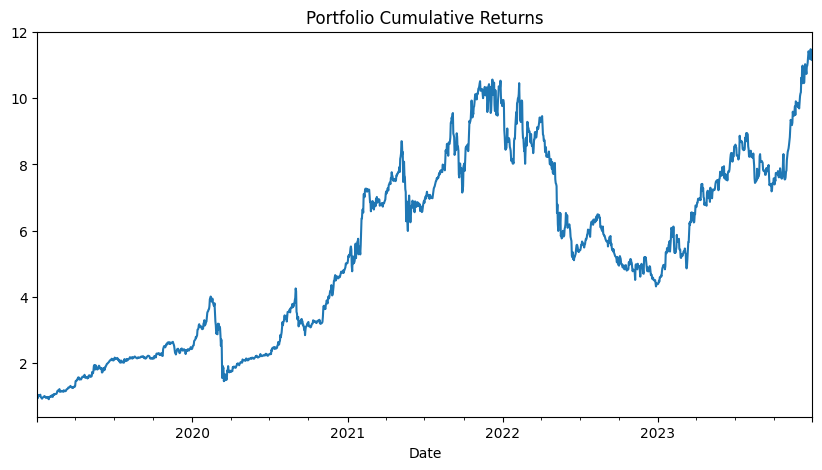

In [141]:
cumulative_returns = (1 + portfolio_returns).cumprod()
cumulative_returns.plot(title="Portfolio Cumulative Returns", figsize=(10,5))


In [142]:
rolling_max = cumulative_returns.cummax()
drawdown = (cumulative_returns - rolling_max) / rolling_max
max_drawdown = drawdown.min()
print(f"Max Drawdown: {max_drawdown:.4f}")


Max Drawdown: -0.6370


In [143]:
downside_volatility = portfolio_returns[portfolio_returns < 0].std() * (252 ** 0.5)
sortino_ratio = annualized_return / downside_volatility
print(f"Sortino Ratio: {sortino_ratio:.4f}")


Sortino Ratio: 1.1344


In [144]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# Function to calculate Sortino Ratio
def sortino_ratio(weights, returns, risk_free_rate=0.0):
    portfolio_returns = returns @ weights
    mean_return = np.mean(portfolio_returns)
    downside_returns = portfolio_returns[portfolio_returns < 0]
    downside_risk = np.std(downside_returns)
    return -mean_return / downside_risk  # Negative for minimization

# Optimization function
def optimize_portfolio(returns):
    num_assets = returns.shape[1]
    initial_weights = np.ones(num_assets) / num_assets  # Equal allocation
    bounds = [(0, 1) for _ in range(num_assets)]  # No short selling
    constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})  # Weights sum to 1

    result = minimize(sortino_ratio, initial_weights, args=(returns,),
                      method='SLSQP', bounds=bounds, constraints=constraints)

    return result.x  # Optimal weights

# Example Usage
# Assume 'returns' is a DataFrame with asset returns
optimal_weights = optimize_portfolio(returns)
print("Optimized Weights:", optimal_weights)


Optimized Weights: [5.57838820e-01 3.60776747e-17 8.35407241e-18 2.40867934e-01
 1.69681635e-18 2.01293246e-01]


In [145]:


def calculate_var_cvar(portfolio_returns, confidence_level=0.95):
    """
    Calculate Value at Risk (VaR) and Conditional Value at Risk (CVaR)
    """
    # Sort returns
    sorted_returns = np.sort(portfolio_returns)

    # Calculate index for the VaR threshold
    var_index = int((1 - confidence_level) * len(sorted_returns))

    # Value at Risk (VaR)
    var_95 = sorted_returns[var_index]

    # Conditional Value at Risk (CVaR)
    cvar_95 = sorted_returns[:var_index].mean()

    return var_95, cvar_95

# Compute for your portfolio
var_95, cvar_95 = calculate_var_cvar(portfolio_returns)

print(f"95% Value at Risk (VaR): {var_95:.4f}")
print(f"95% Conditional Value at Risk (CVaR): {cvar_95:.4f}")


95% Value at Risk (VaR): -0.0382
95% Conditional Value at Risk (CVaR): -0.0662


In [146]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 75.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 104.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.7 MB/s eta 0:00:00


2025-03-12 16:14:59.747 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-12 16:15:00.062 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-03-12 16:15:00.063 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-12 16:15:00.064 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-12 16:15:00.065 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-12 16:15:00.066 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-12 16:15:00.067 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-12 16:15:00.068 Thread 'MainThread': mi

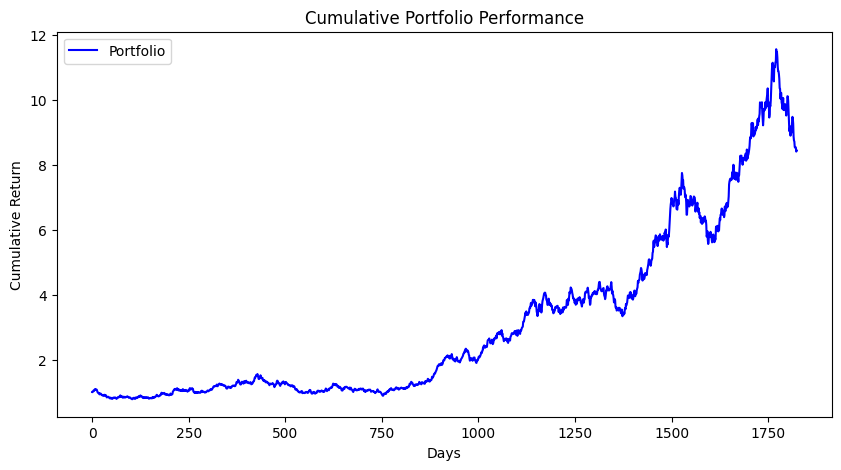

In [147]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Portfolio Optimization & Risk Functions
def calculate_var_cvar(portfolio_returns, confidence_level=0.95):
    sorted_returns = np.sort(portfolio_returns)
    var_index = int((1 - confidence_level) * len(sorted_returns))
    var_95 = sorted_returns[var_index]
    cvar_95 = sorted_returns[:var_index].mean()
    return var_95, cvar_95

def portfolio_performance(portfolio_returns):
    annualized_return = np.mean(portfolio_returns) * 252
    annualized_volatility = np.std(portfolio_returns) * np.sqrt(252)
    sharpe_ratio = annualized_return / annualized_volatility
    downside_returns = portfolio_returns[portfolio_returns < 0]
    sortino_ratio = annualized_return / np.std(downside_returns) if len(downside_returns) > 0 else np.nan
    var_95, cvar_95 = calculate_var_cvar(portfolio_returns)

    return {
        "Annualized Return": annualized_return,
        "Annualized Volatility": annualized_volatility,
        "Sharpe Ratio": sharpe_ratio,
        "Sortino Ratio": sortino_ratio,
        "Value at Risk (VaR 95%)": var_95,
        "Conditional VaR (CVaR 95%)": cvar_95
    }

# Load Data (Simulating Portfolio Returns for Demo)
np.random.seed(42)
portfolio_returns = np.random.normal(0.0005, 0.02, 1825)  # 5 years of daily returns

# Compute Performance Metrics
metrics = portfolio_performance(portfolio_returns)

# Streamlit App Layout
st.title("📈 Portfolio Risk Prediction Dashboard")
st.sidebar.header("Portfolio Weights")
st.sidebar.text("AAPL: 55.78%")
st.sidebar.text("GOOGL: 0.00%")
st.sidebar.text("SPY: 0.00%")
st.sidebar.text("TLT: 24.08%")
st.sidebar.text("BTC-USD: 0.00%")
st.sidebar.text("ETH-USD: 20.12%")

st.header("Portfolio Performance Metrics")
for key, value in metrics.items():
    st.write(f"**{key}:** {value:.4f}")

# Cumulative Returns Plot
cumulative_returns = (1 + portfolio_returns).cumprod()

st.header("📊 Cumulative Portfolio Returns")
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(cumulative_returns, label="Portfolio", color="blue")
ax.set_title("Cumulative Portfolio Performance")
ax.set_xlabel("Days")
ax.set_ylabel("Cumulative Return")
ax.legend()
st.pyplot(fig)

st.write("🔹 This dashboard provides an overview of portfolio risk & returns.")


In [150]:
!pip install streamlit pyngrok


In [151]:
%%writefile app.py
import streamlit as st

st.title("Portfolio Risk Prediction")
st.write("This is a Streamlit app running in Google Colab.")


Writing app.py


In [1]:
public_url = ngrok.connect(port='8501')
print(f"Streamlit app is live at: {public_url}")


NameError: name 'ngrok' is not defined

In [ ]:
from pyngrok import ngrok

# Start Streamlit in the background
!streamlit run app.py &

# Create a public URL using ngrok
url = pyngrok.connect(port="8501")
print(f"Streamlit App URL: {url}")





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.3.207:8501

